In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
import seaborn as sns
from scipy import stats
from scipy.stats import norm

# Getting final merged data for model

In [5]:
#read final merged data 
single_family_model = pd.read_csv('/Users/hp/Projects/zillow/Zillow/final_data_single_family_sold.csv')
townhouse_model = pd.read_csv('/Users/hp/Projects/zillow/Zillow/final_data_townhouse_sold.csv')

In [6]:
#append two dataframe
final_data_sold_model = single_family_model.append(townhouse_model,sort=False)

In [7]:
final_data_sold_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11916 entries, 0 to 1972
Data columns (total 32 columns):
Unnamed: 0          11916 non-null int64
Unnamed: 0.1        11916 non-null int64
latitude            11916 non-null float64
longitude           11916 non-null float64
address             11916 non-null object
city                11916 non-null object
state               11916 non-null object
zip                 11916 non-null int64
bedrooms            11916 non-null float64
bathrooms           11916 non-null float64
sqft                11916 non-null float64
lot_size            11916 non-null float64
year_built          11916 non-null int64
price               11916 non-null float64
sale_type           11916 non-null object
zestimate           11902 non-null float64
date_sold           11916 non-null object
days_on_zillow      73 non-null float64
house_type          11916 non-null object
url                 11916 non-null object
Parcel_Number       11916 non-null int64
Liquefact

In [8]:
# Create a copy of dataframe df to perform data wrangling 
new_df = final_data_sold_model.copy()

In [9]:
# keep track of how many observations
count_observations = len(new_df)

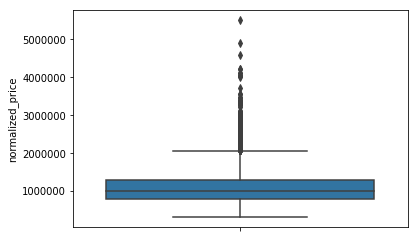

In [10]:
#outliers
import seaborn as sns
sns.boxplot(y=new_df['normalized_price'])

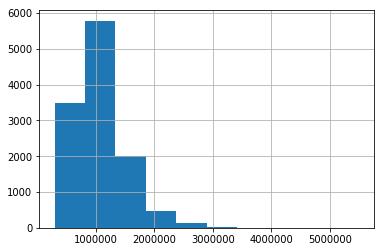

In [11]:
new_df.normalized_price.hist()

# outliers removal for model

In [12]:
def remove_outliers(column, data):
    #lets remove outliers from the sqft_lot15 column
    q3 = data[column].quantile(0.75)
    q1 = data[column].quantile(0.25)
    iqr = q3-q1
    upper = q3 + (1.5*iqr)
    lower = q1 - (1.5*iqr)
    upper_index = data[data[column] >=upper].index
    lower_index = data[data[column] <=lower].index
    data = data.drop(upper_index)
    data = data.drop(lower_index)
    return data

In [13]:
new_df = remove_outliers('normalized_price',new_df)
# to see how many observations were dropped 
count_observations-len(new_df)

379

In [14]:
new_df['normalized_price'].describe()

count    1.153700e+04
mean     1.035795e+06
std      3.486230e+05
min      2.950000e+05
25%      7.750000e+05
50%      9.700000e+05
75%      1.250000e+06
max      2.050000e+06
Name: normalized_price, dtype: float64

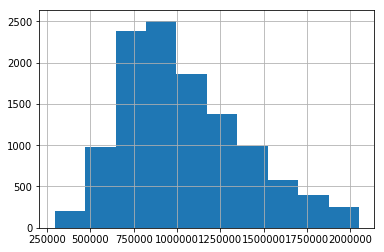

In [15]:
new_df.normalized_price.hist()

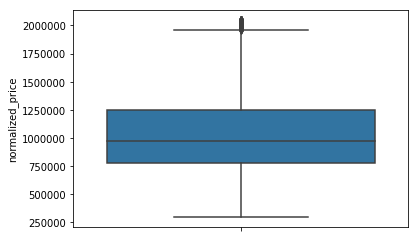

In [16]:
#outliers
import seaborn as sns
sns.boxplot(y=new_df['normalized_price'])

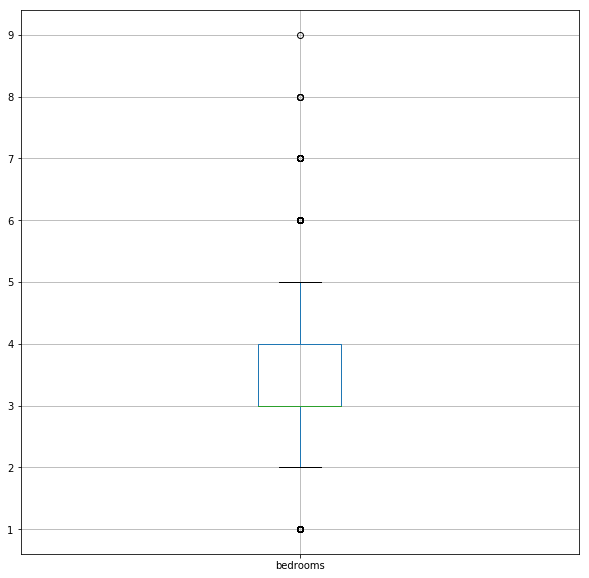

In [17]:
# Using the boxplot we can see if there are any outliers.
new_df.boxplot('bedrooms', figsize= (10,10))

In [18]:
new_df = remove_outliers('bedrooms',new_df)

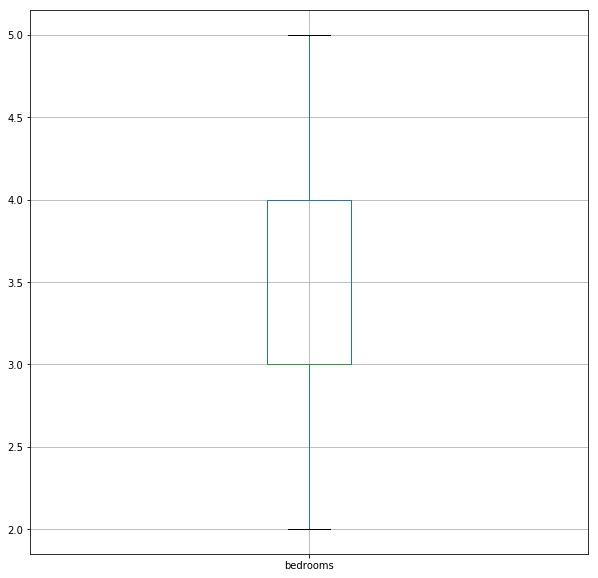

In [19]:
# Using the boxplot we can see if there are any outliers.
new_df.boxplot('bedrooms', figsize= (10,10))

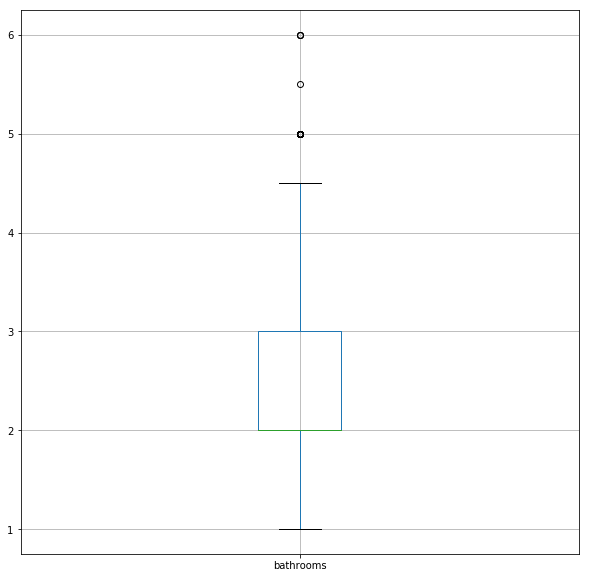

In [20]:
# Using the boxplot we can see if there are any outliers.
new_df.boxplot('bathrooms', figsize= (10,10))

In [21]:
new_df = remove_outliers('bathrooms',new_df)

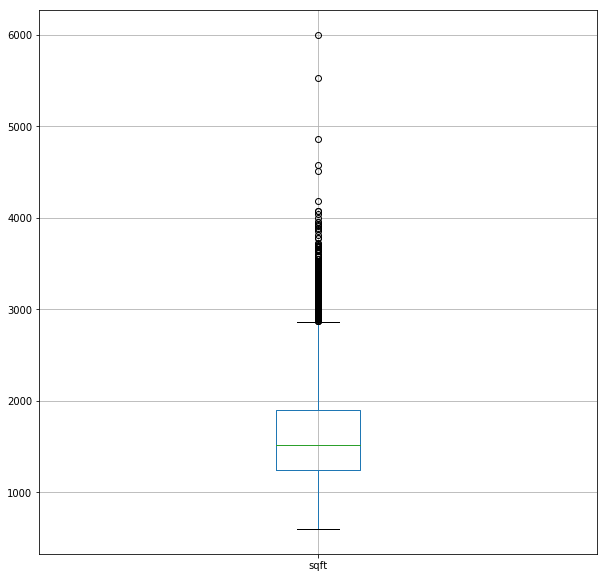

In [22]:
# Using the boxplot we can see if there are any outliers.
new_df.boxplot('sqft', figsize= (10,10))

In [23]:
new_df = remove_outliers('sqft',new_df)

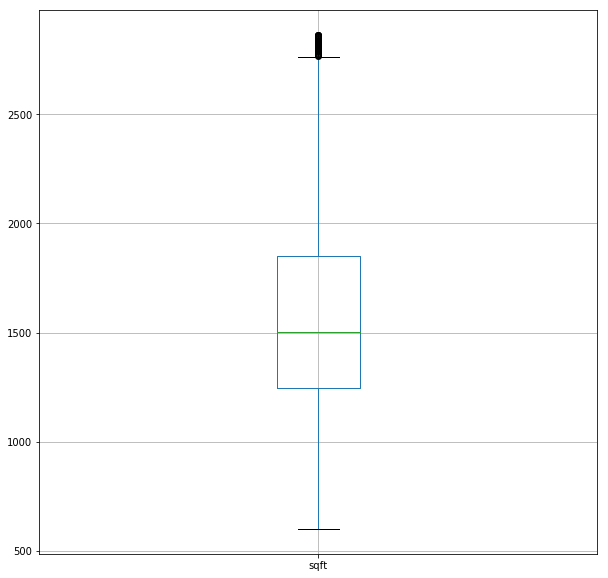

In [24]:
# Using the boxplot we can see if there are any outliers.
new_df.boxplot('sqft', figsize= (10,10))

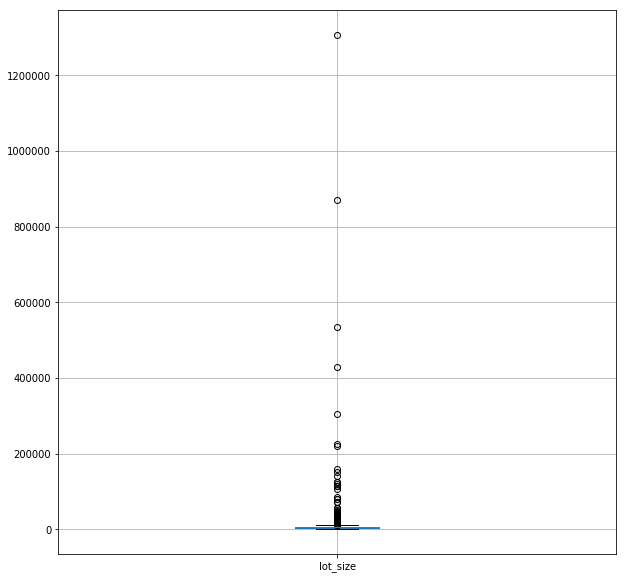

In [25]:
# Using the boxplot we can see if there are any outliers.
new_df.boxplot('lot_size', figsize= (10,10))

In [26]:
new_df = remove_outliers('lot_size',new_df)

In [27]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10543 entries, 12 to 1962
Data columns (total 32 columns):
Unnamed: 0          10543 non-null int64
Unnamed: 0.1        10543 non-null int64
latitude            10543 non-null float64
longitude           10543 non-null float64
address             10543 non-null object
city                10543 non-null object
state               10543 non-null object
zip                 10543 non-null int64
bedrooms            10543 non-null float64
bathrooms           10543 non-null float64
sqft                10543 non-null float64
lot_size            10543 non-null float64
year_built          10543 non-null int64
price               10543 non-null float64
sale_type           10543 non-null object
zestimate           10534 non-null float64
date_sold           10543 non-null object
days_on_zillow      65 non-null float64
house_type          10543 non-null object
url                 10543 non-null object
Parcel_Number       10543 non-null int64
Liquefac

In [28]:
#drop unnecessary columns
new_df = new_df.drop(['Unnamed: 0','Unnamed: 0.1','city','state','days_on_zillow','url','Parcel_Number','price_bin','price/sqft'], axis=1)


In [29]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10543 entries, 12 to 1962
Data columns (total 23 columns):
latitude            10543 non-null float64
longitude           10543 non-null float64
address             10543 non-null object
zip                 10543 non-null int64
bedrooms            10543 non-null float64
bathrooms           10543 non-null float64
sqft                10543 non-null float64
lot_size            10543 non-null float64
year_built          10543 non-null int64
price               10543 non-null float64
sale_type           10543 non-null object
zestimate           10534 non-null float64
date_sold           10543 non-null object
house_type          10543 non-null object
Liquefaction        10543 non-null float64
Landslide           10543 non-null float64
Faultzone           10543 non-null int64
fire_hazard         10543 non-null int64
normalized_price    10543 non-null float64
normalized_diff     10543 non-null float64
normalized_perc     10534 non-null float64


In [30]:
#changing date into datetime type and fire hazard type into int
new_df['date_sold'] = pd.to_datetime(new_df['date_sold'])
new_df['Liquefaction'] = new_df['Liquefaction'].astype(int)
new_df['Landslide'] = new_df['Landslide'].astype(int)
new_df['date_sold_month'] = new_df['date_sold_month'].astype(int)

In [31]:
new_df.columns[new_df.isnull().any()]

Index(['zestimate', 'normalized_perc'], dtype='object')

In [32]:
#missing value counts in each of these columns
total = new_df.isnull().sum().sort_values(ascending=False)
percent = (new_df.isnull().sum()/new_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'],sort=False)
missing_data = missing_data[missing_data['Total']>0]
missing_data

,Total,Percent
zestimate,9,0.000854
normalized_perc,9,0.000854


In [33]:
#replacing liquefaction,landslide,faultzone and fire hazard (1=no,0=yes)
new_df['Liquefaction'].replace([0,1],[1,0],inplace=True)
new_df['Landslide'].replace([0,1],[1,0],inplace=True)
new_df['Faultzone'].replace([0,1],[1,0],inplace=True)
new_df['fire_hazard'].replace([0,1],[1,0],inplace=True)
new_df.head()

,latitude,longitude,address,zip,bedrooms,bathrooms,sqft,lot_size,year_built,price,...,house_type,Liquefaction,Landslide,Faultzone,fire_hazard,normalized_price,normalized_diff,normalized_perc,date_sold_month,date_sold_year
12,37.318599,-121.875621,1248 S 2ND ST,95112,2.0,1.0,600.0,5452.0,1920,907000.0,...,single_family,0,1,1,1,907000.0,232248.0,34.419757,6,2018
16,37.311988,-121.876811,1483 LITTLE ORCHARD ST,95110,2.0,1.0,624.0,6159.0,1900,681000.0,...,single_family,0,1,1,1,640140.0,30428.0,4.537646,12,2018
18,37.343125,-121.870310,903 E SAN FERNANDO ST,95116,2.0,1.0,640.0,2040.0,1925,750000.0,...,single_family,0,1,1,1,712500.0,68088.0,10.565911,10,2017
19,37.320749,-121.931299,443 LASWELL AVE,95128,2.0,1.0,641.0,3963.0,1910,530000.0,...,single_family,1,1,1,1,530000.0,26787.0,4.810996,6,2018
20,37.336260,-121.926192,1380 UNIVERSITY AVE,95126,2.0,1.0,648.0,2252.0,1918,860000.0,...,single_family,0,1,1,1,860000.0,75312.0,8.052072,9,2017


In [34]:
final_data_sold_model = new_df.copy()

# Mapping features for model

In [35]:
final_data_sold_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10543 entries, 12 to 1962
Data columns (total 23 columns):
latitude            10543 non-null float64
longitude           10543 non-null float64
address             10543 non-null object
zip                 10543 non-null int64
bedrooms            10543 non-null float64
bathrooms           10543 non-null float64
sqft                10543 non-null float64
lot_size            10543 non-null float64
year_built          10543 non-null int64
price               10543 non-null float64
sale_type           10543 non-null object
zestimate           10534 non-null float64
date_sold           10543 non-null datetime64[ns]
house_type          10543 non-null object
Liquefaction        10543 non-null int64
Landslide           10543 non-null int64
Faultzone           10543 non-null int64
fire_hazard         10543 non-null int64
normalized_price    10543 non-null float64
normalized_diff     10543 non-null float64
normalized_perc     10534 non-null floa

In [36]:
zip_list = final_data_sold_model['zip'].unique().tolist()

In [37]:
import csv
import pandas

zip_map_inverse = {}

zip_list.sort()
num = 0
for z in zip_list:
    zip_map_inverse[z] = num
    num = num+1

with open('/Users/hp/Projects/zillow/Zillow/zip_map_inverse_file.csv','w') as f1:
    w1 = csv.writer(f1)
    w1.writerows(zip_map_inverse.items())

In [38]:
sale_type_list = final_data_sold_model['sale_type'].unique().tolist()

In [39]:
sale_type_map_inverse = {}

sale_type_list.sort()
num = 0
for z in sale_type_list:
    sale_type_map_inverse[z] = num
    num = num+1

with open('/Users/hp/Projects/zillow/Zillow/sale_type_map_inverse_file.csv','w') as f1:
    w1 = csv.writer(f1)
    w1.writerows(sale_type_map_inverse.items())

In [40]:
house_type_list = final_data_sold_model['house_type'].unique().tolist()
house_type_list

['single_family', 'townhouse']

In [41]:
house_type_map_inverse = {}

house_type_list.sort(reverse=True)
num = 0
for z in house_type_list:
    house_type_map_inverse[z] = num
    num = num+1

with open('/Users/hp/Projects/zillow/Zillow/house_type_map_inverse_file.csv','w') as f1:
    w1 = csv.writer(f1)
    w1.writerows(house_type_map_inverse.items())

In [42]:
import math
import time

sqft_rounded = []
lot_size_rounded = []
year_built_decade = []
#date_sold_month = []
#date_sold_year = []
zip_mapped = []
bathrooms_rounded = []
sale_type_mapped = []
house_type_mapped = []
for index, row in final_data_sold_model.iterrows():
    zip_mapped.append(zip_map_inverse[row['zip']])
    sale_type_mapped.append(sale_type_map_inverse[row['sale_type']])
    house_type_mapped.append(house_type_map_inverse[row['house_type']])

    if math.isnan(row['sqft']):
        sqft_rounded.append(float('nan'))
    else:
        sqft_rounded.append(float(int(row['sqft'] / 100) * 100))
    if math.isnan(row['lot_size']):
        lot_size_rounded.append(float('nan'))
    else:
        lot_size_rounded.append(float(int(row['lot_size'] / 100) * 100))
    if math.isnan(row['year_built']):
        year_built_decade.append(float('nan'))
    else:
        year_built_decade.append(float(int(row['year_built'] / 10) * 10))

    #dat_str = str(row['date_sold'])
    #if dat_str == 'NaT':
        #date_sold_month.append(float('nan'))
        #date_sold_year.append(float('nan'))
    #else:
        #yymmdd,seconds = dat_str.split(' ')
        #yy,mm,dd = dat_str.split('-')
        #date_sold_month.append(mm)
        #date_sold_year.append(yy)

    if math.isnan(row['bathrooms']):
        bathrooms_rounded.append(float('nan'))
    else:
        bathrooms_rounded.append(int(round(row['bathrooms'])))

final_data_sold_model['zip_mapped'] = zip_mapped    
final_data_sold_model['sqft_rounded'] = sqft_rounded
final_data_sold_model['lot_size_rounded'] = lot_size_rounded
final_data_sold_model['year_built_decade'] = year_built_decade
#final_data_sold_model['date_sold_month'] = date_sold_month
#final_data_sold_model['date_sold_year'] = date_sold_year
final_data_sold_model['bathrooms_rounded'] = bathrooms_rounded
final_data_sold_model['sale_type_mapped'] = sale_type_mapped
final_data_sold_model['house_type_mapped'] = house_type_mapped

In [43]:
year_built_decade_list = final_data_sold_model['year_built_decade'].unique().tolist()


In [44]:

import csv
import pandas

year_built_map_inverse = {}

year_built_decade_list.sort()
num = 0
for y in year_built_decade_list:
    year_built_map_inverse[y] = num
    num = num+1

with open('/Users/hp/Projects/zillow/Zillow/year_built_map_inverse_file.csv','w') as f1:
    w1 = csv.writer(f1)
    w1.writerows(year_built_map_inverse.items())



In [45]:

year_built_decade_mapped = []
for index, row in final_data_sold_model.iterrows():
    year_built_decade_mapped.append(year_built_map_inverse[row['year_built_decade']])
    
final_data_sold_model['year_built_decade_mapped'] = year_built_decade_mapped



In [46]:
final_data_sold_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10543 entries, 12 to 1962
Data columns (total 31 columns):
latitude                    10543 non-null float64
longitude                   10543 non-null float64
address                     10543 non-null object
zip                         10543 non-null int64
bedrooms                    10543 non-null float64
bathrooms                   10543 non-null float64
sqft                        10543 non-null float64
lot_size                    10543 non-null float64
year_built                  10543 non-null int64
price                       10543 non-null float64
sale_type                   10543 non-null object
zestimate                   10534 non-null float64
date_sold                   10543 non-null datetime64[ns]
house_type                  10543 non-null object
Liquefaction                10543 non-null int64
Landslide                   10543 non-null int64
Faultzone                   10543 non-null int64
fire_hazard                 10

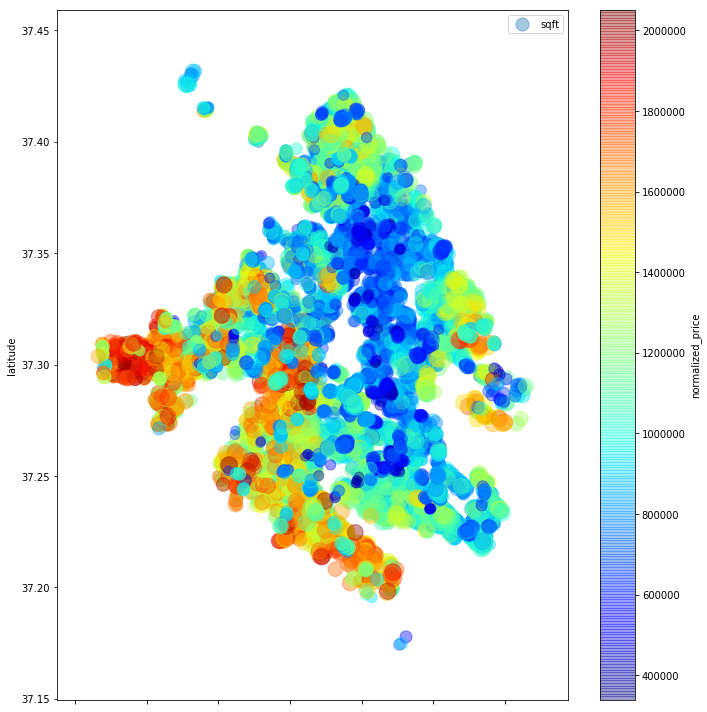

In [47]:
# plot a scatterplot to see the data distribution by longitude and latitude.
# compare them by the size of the sqft_living and price
final_data_sold_model.plot(kind="scatter", x="longitude", y="latitude",
    s=new_df.sqft/10, label="sqft",
    c="normalized_price", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,10),
)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.legend()
plt.tight_layout()
plt.show()


In [48]:
final_data_sold_model = final_data_sold_model.drop(['latitude','longitude','address','zip','bathrooms','sqft','lot_size','year_built','year_built_decade','bathrooms','zip','sqft','lot_size','date_sold','date_sold_year','sale_type','normalized_diff','normalized_perc','year_built_decade','house_type'],axis=1)


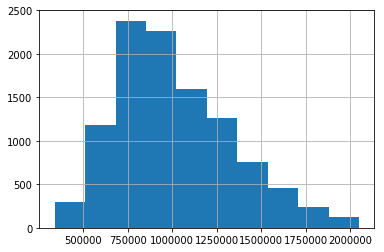

In [49]:
# plot a histogram of price
final_data_sold_model.normalized_price.hist()

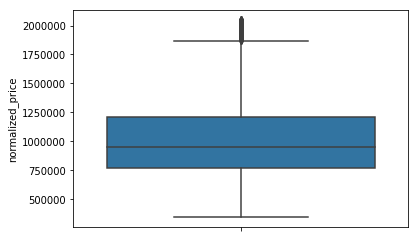

In [50]:
#outliers
import seaborn as sns
sns.boxplot(y=final_data_sold_model['normalized_price'])

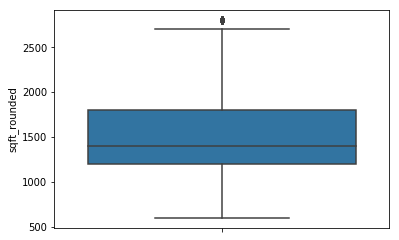

In [51]:
#outliers
import seaborn as sns
sns.boxplot(y=final_data_sold_model['sqft_rounded'])

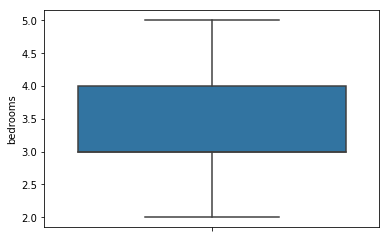

In [52]:
#outliers
import seaborn as sns
sns.boxplot(y=final_data_sold_model['bedrooms'])

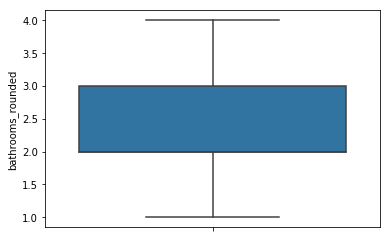

In [53]:
#outliers
import seaborn as sns
sns.boxplot(y=final_data_sold_model['bathrooms_rounded'])

In [54]:
# Create an empty dictionary to hold corrcoef data which will be used later for feature selection
corrcoef_dict = {}
# Define a function to plot a scatter plot with regression line
def reg_plot(x_input,y_input,data):
    _ = plt.subplots(figsize=(10,5))
    # Plot the illiteracy rate versus fertility
    _ = plt.plot(data[x_input], data[y_input], marker='.', linestyle='none')
    plt.margins(0.02)
    _ = plt.xlabel(x_input)
    _ = plt.ylabel(y_input)
    # Perform a linear regression using np.polyfit(): a, b
    a, b = np.polyfit(data[x_input], data[y_input],1)
    # calculate the correaltion 
    corrcoef = np.corrcoef(data[x_input],data[y_input])[1][0]
    corrcoef_dict[x_input] = corrcoef    
    print('corrcoef =', corrcoef)
    # Print the results to the screen
    print('slope =', a)
    print('intercept =', b)
    # Make theoretical line to plot
    x = np.array([0,max(data[x_input])]) #array consists of 0 and maximum x-axis point
    y = a * x + b
    # Add regression line to your plot
    _ = plt.plot(x, y)
    # Draw the plot and save the figure
    plt.title('Scatter plot of '+x_input+' and '+y_input)
    plt.show()

corrcoef = 0.3682064997479183
slope = 155175.99594863635
intercept = 499054.49089829903


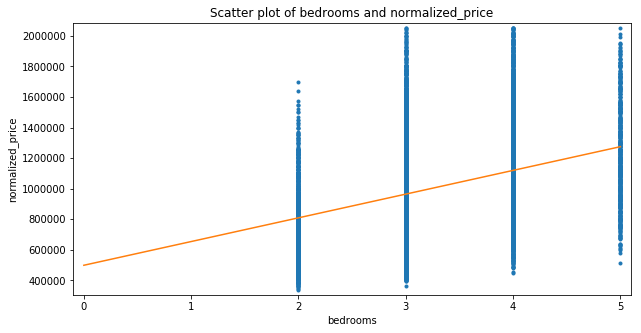

In [55]:
# scatter plot for bedroom vs price
reg_plot('bedrooms', 'normalized_price', data=final_data_sold_model)

corrcoef = 0.25055764865838753
slope = 123636.39122568737
intercept = 736973.1760160187


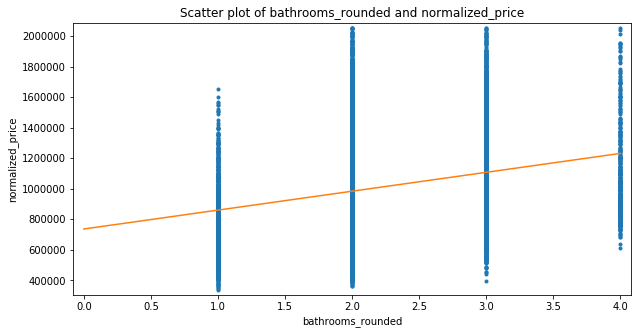

In [56]:
# scatter plot for bathroom vs price
reg_plot('bathrooms_rounded', 'normalized_price', data=final_data_sold_model)

corrcoef = 0.5213102182919926
slope = 393.08579561099305
intercept = 413426.277394951


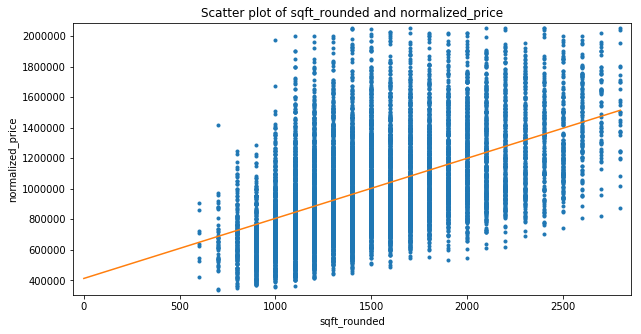

In [57]:
# scatter plot for sqft vs price
reg_plot('sqft_rounded', 'normalized_price', data=final_data_sold_model)

corrcoef = 0.42821201982632545
slope = 58.74021284325456
intercept = 703988.3034503951


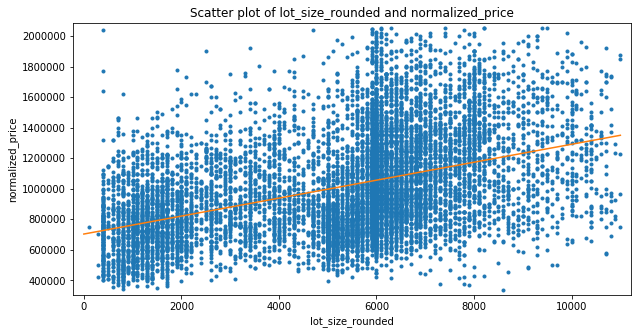

In [58]:
# scatter plot for lot_size vs price
reg_plot('lot_size_rounded', 'normalized_price', data=final_data_sold_model)

corrcoef = -0.05277228791936647
slope = -7710.550734111693
intercept = 1077334.9171062077


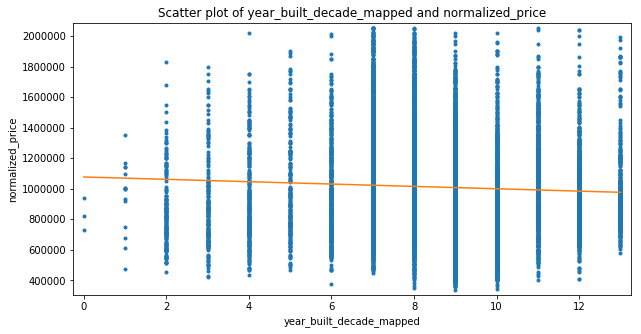

In [59]:
# scatter plot for year_built vs price
reg_plot('year_built_decade_mapped', 'normalized_price', data=final_data_sold_model)

corrcoef = 0.3616377038181231
slope = 235559.06463391407
intercept = 903432.0186443398


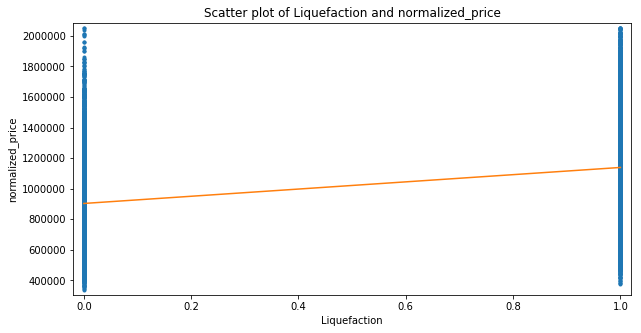

In [60]:
# scatter plot for year_built vs price
reg_plot('Liquefaction', 'normalized_price', data=final_data_sold_model)

corrcoef = -0.0020457508237885797
slope = -5740.838270818297
intercept = 1017255.9918881077


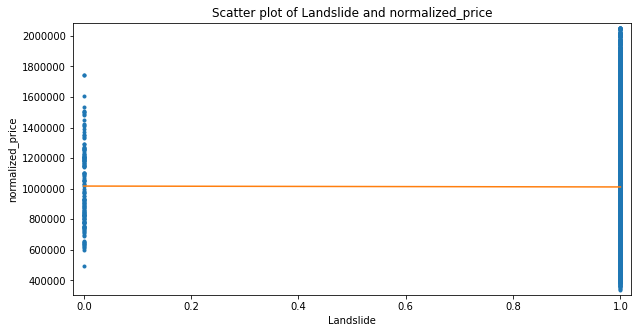

In [61]:
# scatter plot for landslide vs price
reg_plot('Landslide', 'normalized_price', data=final_data_sold_model)

corrcoef = 0.0360624866220678
slope = 148413.18850000072
intercept = 864108.909090903


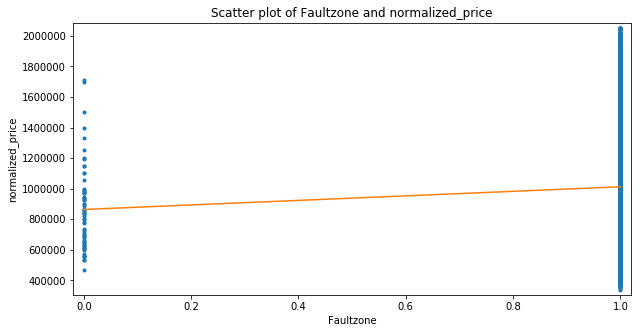

In [62]:
# scatter plot for faultzone vs price
reg_plot('Faultzone', 'normalized_price', data=final_data_sold_model)

corrcoef = nan
slope = 505796.509743903
intercept = 505796.509743903


/Users/hp/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RankWarning: Polyfit may be poorly conditioned
  if sys.path[0] == '':
/Users/hp/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/hp/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


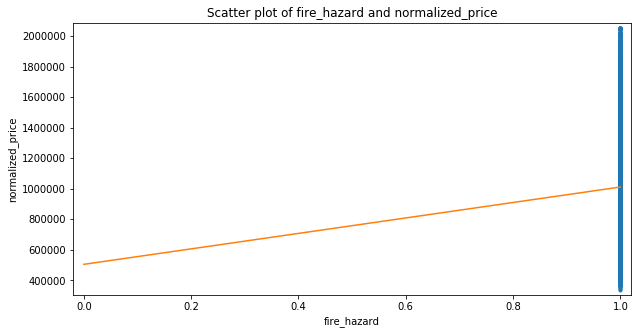

In [63]:
# scatter plot for fire hazard vs price
reg_plot('fire_hazard', 'normalized_price', data=final_data_sold_model)

corrcoef = -0.06502158082970985
slope = -6677.748450018316
intercept = 1057090.7624841304


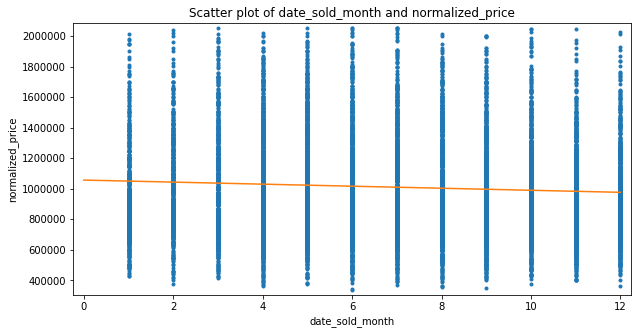

In [64]:
# scatter plot for date_sold_month vs price
reg_plot('date_sold_month', 'normalized_price', data=final_data_sold_model)

corrcoef = 0.3173839875592751
slope = 270730.3295921588
intercept = 788419.6063714862


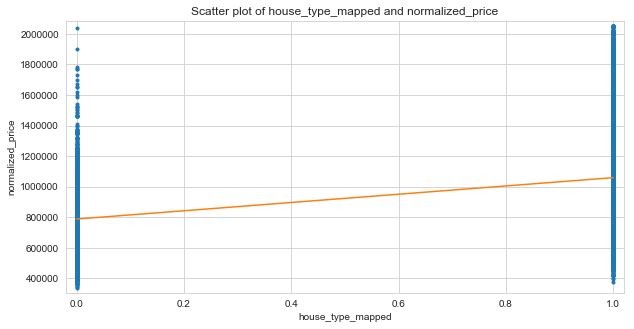

In [833]:
# scatter plot for house_type vs price
reg_plot('house_type_mapped', 'normalized_price', data=final_data_sold_model)

corrcoef = 0.1398325403436501
slope = 5987.56364903462
intercept = 925601.6555573781


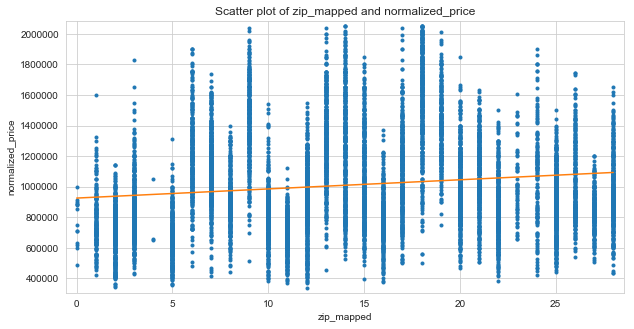

In [834]:
# scatter plot for zip vs price
reg_plot('zip_mapped', 'normalized_price', data=final_data_sold_model)

In [2]:
def bar_chart(column, data):
    #Group the data by number of bedrooms and their average price
    group_col = final_data_sold_model.groupby(column).mean()
    # plot a bar plot of number of bedrooms and average price
    group_col.normalized_price.plot.bar(figsize=(10,10))
    title = 'Average price vs ' + column
    plt.ylabel('Average price ($)')
    plt.title(title)
    plt.show()

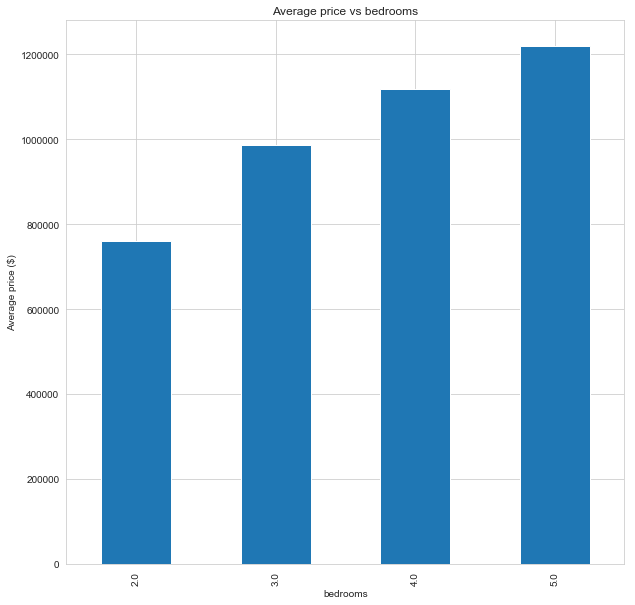

In [836]:
# plot a bar plot of bedrooms and average price
bar_chart('bedrooms', final_data_sold_model)

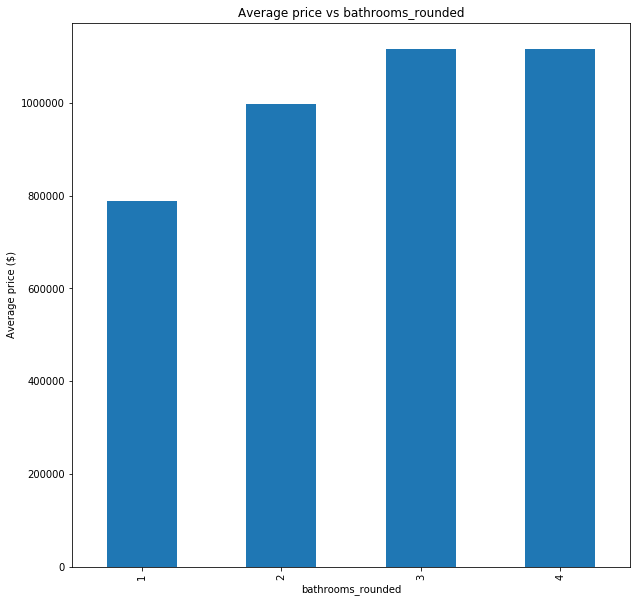

In [65]:
# plot a bar plot of bathrooms and average price
bar_chart('bathrooms_rounded',final_data_sold_model)

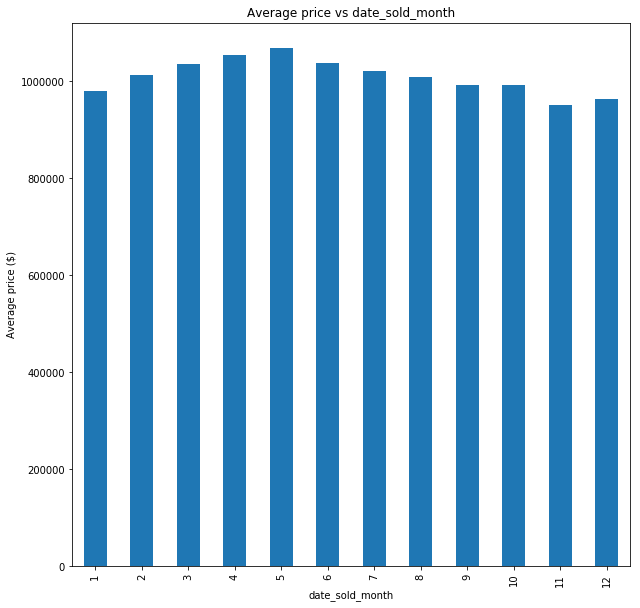

In [66]:
# plot a bar plot of date_sold_month and average price
bar_chart('date_sold_month',final_data_sold_model)

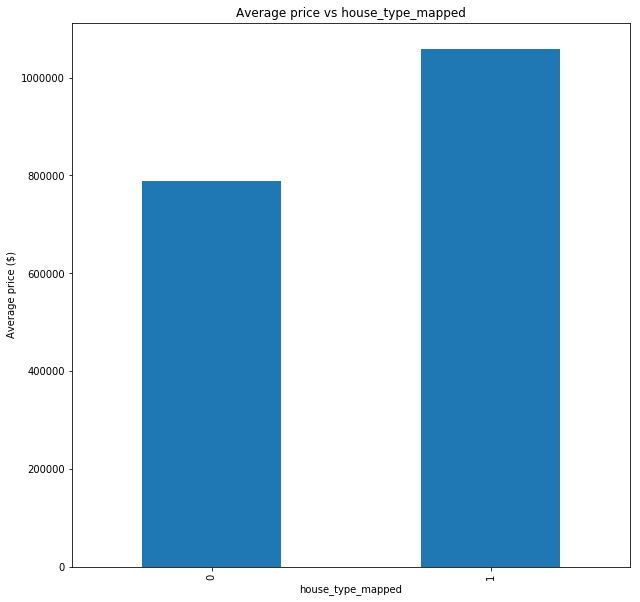

In [67]:
# plot a bar plot of house_type and average price
bar_chart('house_type_mapped',final_data_sold_model)

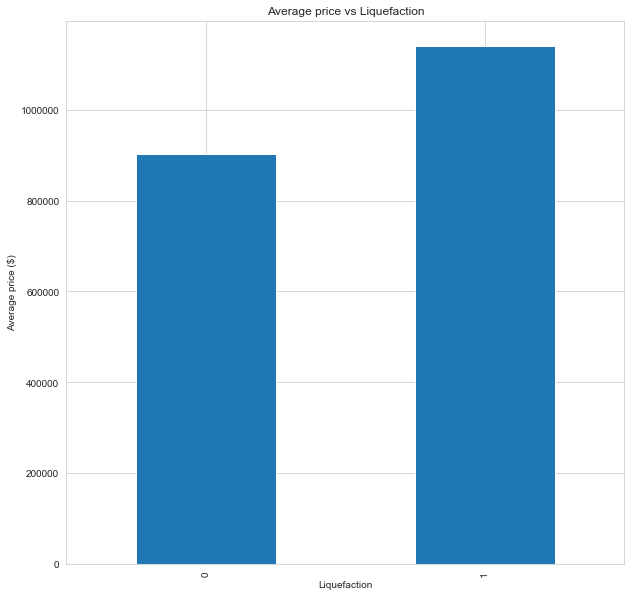

In [840]:
# plot a bar plot of liquefaction and average price
bar_chart('Liquefaction',final_data_sold_model)



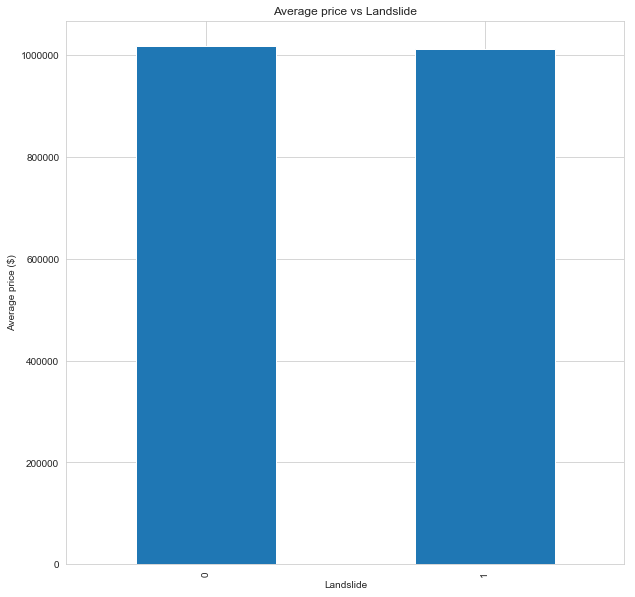

In [841]:
# plot a bar plot of landslide and average price
bar_chart('Landslide',final_data_sold_model)

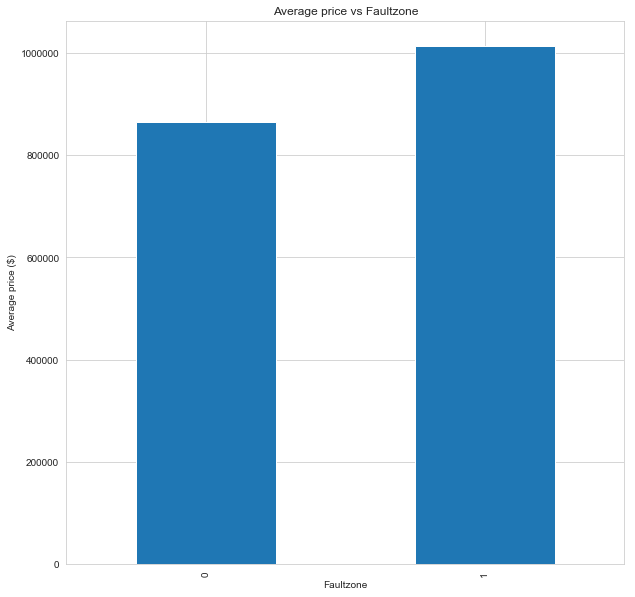

In [842]:
# plot a bar plot of faultzone and average price
bar_chart('Faultzone',final_data_sold_model)

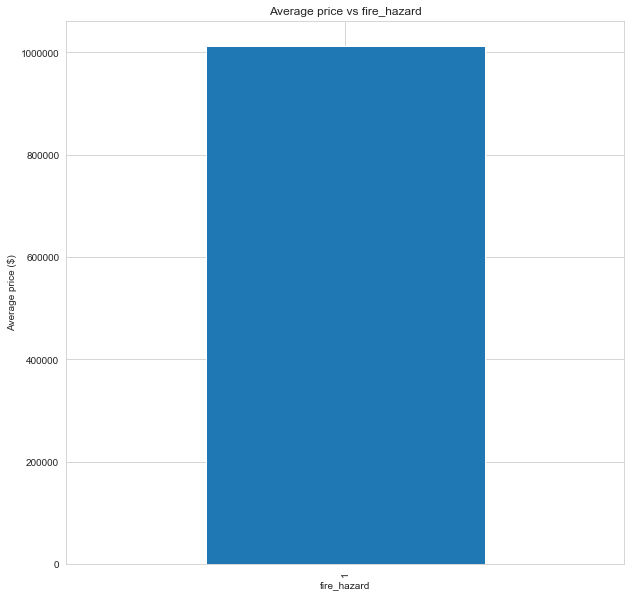

In [843]:
# plot a bar plot of fire hazard and average price
bar_chart('fire_hazard',final_data_sold_model)

# Inferential Statistics¶

## correlation between bedroom and price
#H0: There is no significant correlation between number of bedroom and price.
#Ha: There is a correlation between number of bedrooms and price.

In [844]:
#function to calculate the pearson's r
def pearson_r(x,y):
    ''' Compute Pearson's correlation 
    coefficient between two arrays.'''
    #Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)
    #return entry[0,1]
    return corr_mat[0,1]

In [845]:
np.random.seed(0)
# Compute observed correlation: r_obs
r_obs = pearson_r(final_data_sold_model.bedrooms, final_data_sold_model.normalized_price)
# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)
# Draw replicates
for i in range(10000):
    # Permute bedrooms measurments: bedrooms_permuted
    bedrooms_permuted = np.random.permutation(final_data_sold_model.bedrooms)
    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(bedrooms_permuted, final_data_sold_model.normalized_price)
# Compute p-value: p
p_value = np.sum(perm_replicates>=r_obs) / len(perm_replicates)
print('p-val =', p_value)

p-val = 0.0


p-value = 0. The p-value is less than level of significance 0.05, so we reject the null hypothesis. There is a correlation between number of bedrooms and price.

## correlation between bathrooms and price
#H0: There is no significant correlation between number of bathroom and price.
#Ha: There is a correlation.

In [846]:
np.random.seed(1)
# Compute observed correlation: r_obs
r_obs = pearson_r(final_data_sold_model.bathrooms_rounded, final_data_sold_model.normalized_price)
# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)
# Draw replicates
for i in range(10000):
    # Permute bathrooms measurments: bathrooms_permuted
    bathrooms_permuted = np.random.permutation(final_data_sold_model.bathrooms_rounded)
    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(bathrooms_permuted, final_data_sold_model.normalized_price)
# Compute p-value: p
p_value = np.sum(perm_replicates>=r_obs) / len(perm_replicates)
print('p-val =', p_value)

p-val = 0.0


p-value = 0. The p-value is less than level of significance 0.05, so we reject the null hypothesis. There is a correlation between number of bathrooms and price.

## correlation between sqft and price
#H0: There is no significant correlation between sqft and price.
#Ha: There is a correlation.

In [847]:
np.random.seed(0)
# Compute observed correlation: r_obs
r_obs = pearson_r(final_data_sold_model.sqft_rounded, final_data_sold_model.normalized_price)
# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)
# Draw replicates
for i in range(10000):
    # Permute sqft measurments: sqft_living_permuted
    sqft_permuted = np.random.permutation(final_data_sold_model.sqft_rounded)
    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(sqft_permuted, final_data_sold_model.normalized_price)
# Compute p-value: p
p_value = np.sum(perm_replicates>=r_obs) / len(perm_replicates)
print('p-val =', p_value)

p-val = 0.0


p-value = 0.0. The p-value is less than level of significance 0.05, so we reject the null hypothesis. There is a correlation between sqft and price.

## correlation between lot size and price

#H0: There is no significant correlation between lot_size and price.
#Ha: There is a correlation.

In [848]:
np.random.seed(0)
# Compute observed correlation: r_obs
r_obs = pearson_r(final_data_sold_model.lot_size_rounded, final_data_sold_model.normalized_price)
# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)
# Draw replicates
for i in range(10000):
    # Permute lot_size measurments: lot_size_living_permuted
    lot_size_permuted = np.random.permutation(final_data_sold_model.lot_size_rounded)
    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(sqft_permuted, final_data_sold_model.normalized_price)
# Compute p-value: p
p_value = np.sum(perm_replicates>=r_obs) / len(perm_replicates)
print('p-val =', p_value)

p-val = 0.0


p-value = 0.0. The p-value is less than level of significance 0.05, so we reject the null hypothesis. There is a correlation between lot_size and price.


## correlation between year_built and price
#H0: There is no significant correlation between year_built and price.
#Ha: There is a correlation.

In [849]:
np.random.seed(0)
# Compute observed correlation: r_obs
r_obs = pearson_r(final_data_sold_model.year_built_decade_mapped, final_data_sold_model.normalized_price)
# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)
# Draw replicates
for i in range(10000):
    # Permute year_built measurments: year_built_permuted
    year_built_permuted = np.random.permutation(final_data_sold_model.year_built_decade_mapped)
    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(year_built_permuted, final_data_sold_model.normalized_price)
# Compute p-value: p
p_value = np.sum(perm_replicates>=r_obs) / len(perm_replicates)
print('p-val =', p_value)

p-val = 1.0


p-value = 1.0. The p-value is greater than level of significance 0.05, so we accept the null hypothesis. There is a no statistical importance between year_built and price.

## correlation between liquefaction and price
#H0: There is no significant correlation between liquefaction and price.
#Ha: There is a correlation.

In [850]:
np.random.seed(0)
# Compute observed correlation: r_obs
r_obs = pearson_r(final_data_sold_model.Liquefaction, final_data_sold_model.normalized_price)
# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)
# Draw replicates
for i in range(10000):
    # Permute liquefaction measurments: liquefaction_permuted
    liquefaction_permuted = np.random.permutation(final_data_sold_model.Liquefaction)
    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(liquefaction_permuted, final_data_sold_model.normalized_price)
# Compute p-value: p
p_value = np.sum(perm_replicates>=r_obs) / len(perm_replicates)
print('p-val =', p_value)

p-val = 0.0


p-value = 0.0. The p-value is less than level of significance 0.05, so we reject the null hypothesis. There is a correlation between liquefaction and price.

## correlation between fault zone and price
#H0: There is no significant correlation between faultzone and price.
#Ha: There is a correlation.

In [851]:
np.random.seed(0)
# Compute observed correlation: r_obs
r_obs = pearson_r(final_data_sold_model.Faultzone, final_data_sold_model.normalized_price)
# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)
# Draw replicates
for i in range(10000):
    # Permute faultzone measurments: fault zone_permuted
    fault_zone_permuted = np.random.permutation(final_data_sold_model.Faultzone)
    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(fault_zone_permuted, final_data_sold_model.normalized_price)
# Compute p-value: p
p_value = np.sum(perm_replicates>=r_obs) / len(perm_replicates)
print('p-val =', p_value)

p-val = 0.0


p-value = 0. The p-value is less than level of significance 0.05, so we reject the null hypothesis. There is a correlation between faultzone and price.

## correlation between landslide and price
#H0: There is no significant correlation between landslide and price.
#Ha: There is a correlation.

In [852]:
np.random.seed(0)
# Compute observed correlation: r_obs
r_obs = pearson_r(final_data_sold_model.Landslide, final_data_sold_model.normalized_price)
# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)
# Draw replicates
for i in range(10000):
    # Permute landslide measurments: landslide_permuted
    landslide_permuted = np.random.permutation(final_data_sold_model.Landslide)
    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(landslide_permuted, final_data_sold_model.normalized_price)
# Compute p-value: p
p_value = np.sum(perm_replicates>=r_obs) / len(perm_replicates)
print('p-val =', p_value)

p-val = 0.5817


p-value = 0.5817. The p-value is greater than level of significance 0.05, so we accept the null hypothesis. There is a no statistical importance between landslide and price.

## correlation between sold_month and price
#H0: There is no significant correlation between date_sold_month and price.
#Ha: There is a correlation.

In [853]:
np.random.seed(0)
# Compute observed correlation: r_obs
r_obs = pearson_r(final_data_sold_model.date_sold_month, final_data_sold_model.normalized_price)
# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)
# Draw replicates
for i in range(10000):
    # Permute sold_month measurments: sold_month_permuted
    sold_month_permuted = np.random.permutation(final_data_sold_model.date_sold_month)
    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(sold_month_permuted, final_data_sold_model.normalized_price)
# Compute p-value: p
p_value = np.sum(perm_replicates>=r_obs) / len(perm_replicates)
print('p-val =', p_value)

p-val = 1.0


p-value = 1.0. The p-value is greater than level of significance 0.05, so we accept the null hypothesis. There is a no statistical importance between sold month and price.

## correlation between house_type and price
#H0: There is no significant correlation between house_type and price.
#Ha: There is a correlation.

In [854]:
np.random.seed(0)
# Compute observed correlation: r_obs
r_obs = pearson_r(final_data_sold_model.house_type_mapped, final_data_sold_model.normalized_price)
# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)
# Draw replicates
for i in range(10000):
    # Permute sold_month measurments: sold_month_permuted
    house_type_permuted = np.random.permutation(final_data_sold_model.house_type_mapped)
    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(house_type_permuted, final_data_sold_model.normalized_price)
# Compute p-value: p
p_value = np.sum(perm_replicates>=r_obs) / len(perm_replicates)
print('p-val =', p_value)

p-val = 0.0


p-value = 0.0. The p-value is less than level of significance 0.05, so we reject the null hypothesis. There is a correlation between house_type and price.

## correlation between zip code and price
#H0: There is no significant correlation between zip and price.
#Ha: There is a correlation.

In [855]:
np.random.seed(0)
# Compute observed correlation: r_obs
r_obs = pearson_r(final_data_sold_model.zip_mapped, final_data_sold_model.normalized_price)
# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)
# Draw replicates
for i in range(10000):
    # Permute zip measurments: zip_permuted
    zip_permuted = np.random.permutation(final_data_sold_model.zip_mapped)
    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(zip_permuted, final_data_sold_model.normalized_price)
# Compute p-value: p
p_value = np.sum(perm_replicates>=r_obs) / len(perm_replicates)
print('p-val =', p_value)

p-val = 0.0


p-value = 0.0. The p-value is less than level of significance 0.05, so we reject the null hypothesis. There is a correlation between zip and price.


In [856]:
final_data_sold_model.to_csv(r'/Users/hp/Projects/zillow/Zillow/final_data_sold_model.csv')

# Machine Learning

Linear Regression

Decision Tree Regression

Gradient Boosting Regsresion

Random Forest Regression

In [857]:
final_data_sold_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10543 entries, 12 to 1962
Data columns (total 16 columns):
bedrooms                    10543 non-null float64
price                       10543 non-null float64
zestimate                   10534 non-null float64
Liquefaction                10543 non-null int64
Landslide                   10543 non-null int64
Faultzone                   10543 non-null int64
fire_hazard                 10543 non-null int64
normalized_price            10543 non-null float64
date_sold_month             10543 non-null int64
zip_mapped                  10543 non-null int64
sqft_rounded                10543 non-null float64
lot_size_rounded            10543 non-null float64
bathrooms_rounded           10543 non-null int64
sale_type_mapped            10543 non-null int64
house_type_mapped           10543 non-null int64
year_built_decade_mapped    10543 non-null int64
dtypes: float64(6), int64(10)
memory usage: 1.4 MB


In [858]:
#X is the features/data we use for our model (input data)
# i did not include id because it is not a predictor of the price
# i did not include date in the features because it is a datatime object
X = final_data_sold_model.drop(['price','normalized_price','zestimate'],axis=1)
#y is the target of our data
y = final_data_sold_model['normalized_price']

In [859]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10543 entries, 12 to 1962
Data columns (total 13 columns):
bedrooms                    10543 non-null float64
Liquefaction                10543 non-null int64
Landslide                   10543 non-null int64
Faultzone                   10543 non-null int64
fire_hazard                 10543 non-null int64
date_sold_month             10543 non-null int64
zip_mapped                  10543 non-null int64
sqft_rounded                10543 non-null float64
lot_size_rounded            10543 non-null float64
bathrooms_rounded           10543 non-null int64
sale_type_mapped            10543 non-null int64
house_type_mapped           10543 non-null int64
year_built_decade_mapped    10543 non-null int64
dtypes: float64(3), int64(10)
memory usage: 1.1 MB


In [860]:
#Preparing a dataframe for model analysis
#Data frame for evaluation metrics
metrics = pd.DataFrame(index=['rmse', 'r2_score', 'mae','mape'],columns=['LinearReg','DecisionTree','GradientBoost','RandomForest'])



In [861]:
# Sperate train and test data
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# create traing and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# import the model
from sklearn.linear_model import LinearRegression
# 1. Set up the model
lr = LinearRegression()

# 2. Use fit
lr.fit(X_train, y_train)

lr_predict = lr.predict(X_test)
mse = mean_squared_error(y_test, lr_predict)
rmse = np.sqrt(mse)
r2_score = r2_score(y_test, lr_predict)

# Calculate MAD and MAPE
errors = abs(lr_predict - y_test)
mae = np.mean(errors)
mape = 100 * np.mean(errors / y_test)


#entering metrics score to the metics dataframe
metrics.loc['rmse','LinearReg'] = rmse
metrics.loc['r2_score','LinearReg'] = r2_score
metrics.loc['mae','LinearReg'] = mae
metrics.loc['mape','LinearReg'] = mape

print("Mean Squared Error (MSE): %.2f" % mse)
print("Root Mean Squared Error (RMSE): %.4f" % rmse)
print( 'r2_score: %.4f' % r2_score)
print('Mean Absolute Error (MAE): {:0.2f}'.format(mae))
print('Mean Absolute Percent Error (MAPE): {:0.2f}'.format(mape))

Mean Squared Error (MSE): 54296634556.66
Root Mean Squared Error (RMSE): 233016.3826
r2_score: 0.4637
Mean Absolute Error (MAE): 182963.47
Mean Absolute Percent Error (MAPE): 19.28


# Feature Selection


In machine learning and statistics, feature selection, also known as variable selection, attribute selection or variable subset selection, is the process of selecting a subset of relevant features for use in model construction. Removing irrelevant features results in a better performing, easier to understand, and runs faster.

In [862]:
#Preparing a dataframe for model analysis
#Data frame for evaluation metrics
LinearReg_metrics = pd.DataFrame(index=['rmse', 'r2_score', 'mae','mape'],columns=['LinearReg','LinearRegBack1','LinearRegBack2',
                                                                         'LinearRegBack3','LinearRegUnivariate'])
#entering metrics score to the LinearReg_metics dataframe
LinearReg_metrics.loc['rmse','LinearReg'] = rmse
LinearReg_metrics.loc['r2_score','LinearReg'] = r2_score
LinearReg_metrics.loc['mae','LinearReg'] = mae
LinearReg_metrics.loc['mape','LinearReg'] = mape

In [863]:
corrcoef = pd.Series(corrcoef_dict)
corrcoef.sort_values()

date_sold_month            -0.065022
year_built_decade_mapped   -0.052772
Landslide                  -0.002046
Faultzone                   0.036062
zip_mapped                  0.139833
bathrooms_rounded           0.250558
house_type_mapped           0.317384
Liquefaction                0.361638
bedrooms                    0.368206
lot_size_rounded            0.428212
sqft_rounded                0.521310
fire_hazard                      NaN
dtype: float64

In [864]:
# Backward Elemination 
# Remove date_sold_month
#X is the features/data we use for our model (input data)
X_1 = final_data_sold_model.drop(['price','normalized_price','zestimate','date_sold_month'],axis=1)

# create new traing and testing dataset
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_1, y, test_size=0.2, random_state=0)

# import the model
from sklearn.linear_model import LinearRegression
# 1. Set up the model
lr1 = LinearRegression()

# 2. Use fit
lr1.fit(X_train1, y_train1)

lr1_predict = lr1.predict(X_test1)
mse = mean_squared_error(y_test1, lr1_predict)
rmse = np.sqrt(mse)
r2_score = lr1.score(X_test1,y_test1)

# Calculate MAD and MAPE
errors = abs(lr1_predict - y_test1)
mae = np.mean(errors)
mape = 100 * np.mean(errors / y_test1)

#entering metrics score to the LinearReg_metics dataframe
LinearReg_metrics.loc['rmse','LinearRegBack1'] = rmse
LinearReg_metrics.loc['r2_score','LinearRegBack1'] = r2_score
LinearReg_metrics.loc['mae','LinearRegBack1'] = mae
LinearReg_metrics.loc['mape','LinearRegBack1'] = mape

print("Mean Squared Error (MSE): %.2f" % mse)
print("Root Mean Squared Error (RMSE): %.4f" % rmse)
print( 'r2_score: %.4f' % r2_score)
print('Mean Absolute Error (MAE): {:0.2f}'.format(mae))
print('Mean Absolute Percent Error (MAPE): {:0.2f}'.format(mape))

Mean Squared Error (MSE): 54651994287.89
Root Mean Squared Error (RMSE): 233777.6599
r2_score: 0.4601
Mean Absolute Error (MAE): 183992.47
Mean Absolute Percent Error (MAPE): 19.37


In [865]:
# Backward Elemination 
# Remove year_built_decade
#X is the features/data we use for our model (input data)
X_2 = final_data_sold_model.drop(['price','normalized_price','zestimate','date_sold_month','year_built_decade_mapped'],axis=1)

# create new traing and testing dataset
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_2, y, test_size=0.2, random_state=0)

# import the model
from sklearn.linear_model import LinearRegression
# 1. Set up the model
lr2 = LinearRegression()

# 2. Use fit
lr2.fit(X_train2, y_train2)

lr2_predict = lr2.predict(X_test2)
mse = mean_squared_error(y_test2, lr2_predict)
rmse = np.sqrt(mse)
r2_score = lr2.score(X_test2,y_test2)

# Calculate MAD and MAPE
errors = abs(lr2_predict - y_test2)
mae = np.mean(errors)
mape = 100 * np.mean(errors / y_test2)

#entering metrics score to the LinearReg_metics dataframe
LinearReg_metrics.loc['rmse','LinearRegBack2'] = rmse
LinearReg_metrics.loc['r2_score','LinearRegBack2'] = r2_score
LinearReg_metrics.loc['mae','LinearRegBack2'] = mae
LinearReg_metrics.loc['mape','LinearRegBack2'] = mape

print("Mean Squared Error (MSE): %.2f" % mse)
print("Root Mean Squared Error (RMSE): %.4f" % rmse)
print( 'r2_score: %.4f' % r2_score)
print('Mean Absolute Error (MAE): {:0.2f}'.format(mae))
print('Mean Absolute Percent Error (MAPE): {:0.2f}'.format(mape))


Mean Squared Error (MSE): 54835870970.78
Root Mean Squared Error (RMSE): 234170.6023
r2_score: 0.4583
Mean Absolute Error (MAE): 183811.20
Mean Absolute Percent Error (MAPE): 19.29


In [866]:
# Backward Elemination 
# Remove landslide and fire hazard
# X is the features/data we use for our model (input data)
X_3 = final_data_sold_model.drop(['price','normalized_price','zestimate','date_sold_month','year_built_decade_mapped','Landslide','fire_hazard'],axis=1)

# create new traing and testing dataset
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_3, y, test_size=0.2, random_state=0)

# import the model
from sklearn.linear_model import LinearRegression
# 1. Set up the model
lr3 = LinearRegression()

# 2. Use fit
lr3.fit(X_train3, y_train3)

lr3_predict = lr3.predict(X_test3)
mse = mean_squared_error(y_test3, lr3_predict)
rmse = np.sqrt(mse)
r2_score = lr3.score(X_test3,y_test3)

# Calculate MAD and MAPE
errors = abs(lr3_predict - y_test3)
mae = np.mean(errors)
mape = 100 * np.mean(errors / y_test3)

#entering metrics score to the LinearReg_metics dataframe
LinearReg_metrics.loc['rmse','LinearRegBack3'] = rmse
LinearReg_metrics.loc['r2_score','LinearRegBack3'] = r2_score
LinearReg_metrics.loc['mae','LinearRegBack3'] = mae
LinearReg_metrics.loc['mape','LinearRegBack3'] = mape

print("Mean Squared Error (MSE): %.2f" % mse)
print("Root Mean Squared Error (RMSE): %.4f" % rmse)
print( 'r2_score: %.4f' % r2_score)
print('Mean Absolute Error (MAE): {:0.2f}'.format(mae))
print('Mean Absolute Percent Error (MAPE): {:0.2f}'.format(mape))

Mean Squared Error (MSE): 54976069114.77
Root Mean Squared Error (RMSE): 234469.7616
r2_score: 0.4569
Mean Absolute Error (MAE): 184014.10
Mean Absolute Percent Error (MAPE): 19.30


In [867]:
# try univariate feature selection
# Import the necessary libraries first
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# Feature extraction using 10 featrures down from 20 features
test = SelectKBest(score_func=f_regression)
fit = test.fit(X, y)

X_4 = fit.transform(X)

# create new traing and testing dataset
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_4, y, test_size=0.2, random_state=0)

# import the model
from sklearn.linear_model import LinearRegression
# 1. Set up the model
lr4= LinearRegression()

# 2. Use fit
lr4.fit(X_train4, y_train4)

lr4_predict = lr4.predict(X_test4)
mse = mean_squared_error(y_test4, lr4_predict)
rmse = np.sqrt(mse)
r2_score = lr4.score(X_test4,y_test4)

# Calculate MAD and MAPE
errors = abs(lr4_predict - y_test4)
mae = np.mean(errors)
mape = 100 * np.mean(errors / y_test4)

#entering metrics score to the LinearReg_metics dataframe
LinearReg_metrics.loc['rmse','LinearRegUnivariate'] = rmse
LinearReg_metrics.loc['r2_score','LinearRegUnivariate'] = r2_score
LinearReg_metrics.loc['mae','LinearRegUnivariate'] = mae
LinearReg_metrics.loc['mape','LinearRegUnivariate'] = mape

print("Mean Squared Error (MSE): %.2f" % mse)
print("Root Mean Squared Error (RMSE): %.4f" % rmse)
print( 'r2_score: %.4f' % r2_score)
print('Mean Absolute Error (MAE): {:0.2f}'.format(mae))
print('Mean Absolute Percent Error (MAPE): {:0.2f}'.format(mape))


Mean Squared Error (MSE): 54478993613.05
Root Mean Squared Error (RMSE): 233407.3555
r2_score: 0.4619
Mean Absolute Error (MAE): 183368.80
Mean Absolute Percent Error (MAPE): 19.31


/Users/hp/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/hp/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/hp/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/hp/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/hp/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/hp/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infr

In [868]:
LinearReg_metrics

,LinearReg,LinearRegBack1,LinearRegBack2,LinearRegBack3,LinearRegUnivariate
rmse,233016,233778,234171,234470,233407
r2_score,0.463659,0.460149,0.458332,0.456947,0.461858
mae,182963,183992,183811,184014,183369
mape,19.2771,19.3714,19.289,19.2974,19.3078


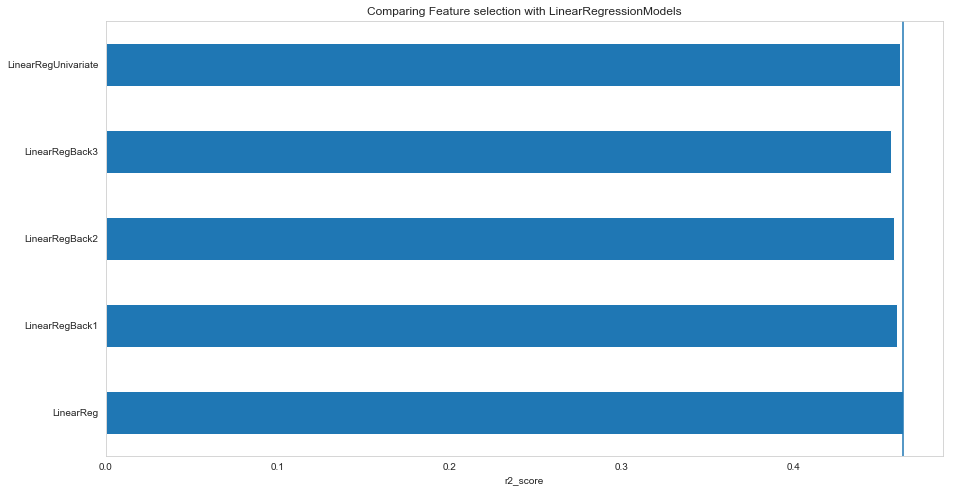

In [869]:
#plot a horizontal bar plot for the metrics of different regressor
fig, ax = plt.subplots(figsize=(15,8))
LinearReg_metrics.loc['r2_score'].plot(kind='barh', ax=ax)
ax.axvline(max(LinearReg_metrics.loc['r2_score']))
plt.title('Comparing Feature selection with LinearRegressionModels')
plt.xlabel('r2_score')
ax.grid()

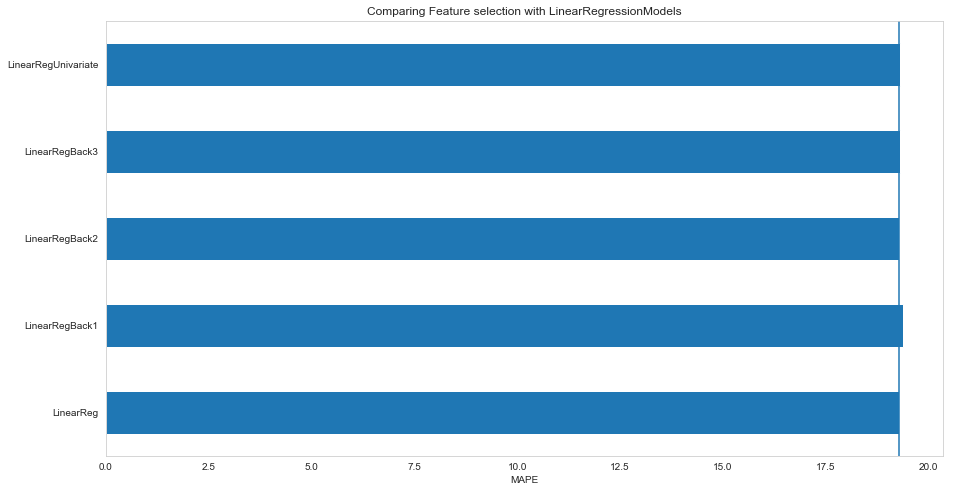

In [870]:
#plot a horizontal bar plot for the metrics of different regressor
fig, ax = plt.subplots(figsize=(15,8))
LinearReg_metrics.loc['mape'].plot(kind='barh', ax=ax)
ax.axvline(min(LinearReg_metrics.loc['mape']))
plt.title('Comparing Feature selection with LinearRegressionModels')
plt.xlabel('MAPE')
ax.grid()

The both bar plot suggest us that we should keep all the features to better predict the house price.

# Comparing other Regression Models.

In [871]:
# Import
from sklearn.tree import DecisionTreeRegressor

# 1. Set up the model
dtr = DecisionTreeRegressor()
# 2. Use fit
dtr.fit(X_train, y_train)

dtr_predict = dtr.predict(X_test)
mse = mean_squared_error(y_test, dtr_predict)
rmse = np.sqrt(mse)
r2_score = dtr.score(X_test,y_test)

# Calculate MAD and MAPE
errors = abs(dtr_predict - y_test)
mae = np.mean(errors)
mape = 100 * np.mean(errors / y_test)

#entering metrics score to the metics dataframe
metrics.loc['rmse','DecisionTree'] = rmse
metrics.loc['r2_score','DecisionTree'] = r2_score
metrics.loc['mae','DecisionTree'] = mae
metrics.loc['mape','DecisionTree'] = mape

print("Mean Squared Error: %.2f" % mse)
print("Root Mean Squared Error: %.2f" % rmse)
print("r-squared score : ", r2_score)
print('Mean Absolute Deviation (MAE): {:0.2f}'.format(mae))
print('Mean Absolute Percent Error (MAPE): {:0.2f}'.format(mape))

Mean Squared Error: 43361291535.89
Root Mean Squared Error: 208233.74
r-squared score :  0.5716779806579388
Mean Absolute Deviation (MAE): 155321.44
Mean Absolute Percent Error (MAPE): 16.13


In [872]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8434 entries, 193 to 2872
Data columns (total 13 columns):
bedrooms                    8434 non-null float64
Liquefaction                8434 non-null int64
Landslide                   8434 non-null int64
Faultzone                   8434 non-null int64
fire_hazard                 8434 non-null int64
date_sold_month             8434 non-null int64
zip_mapped                  8434 non-null int64
sqft_rounded                8434 non-null float64
lot_size_rounded            8434 non-null float64
bathrooms_rounded           8434 non-null int64
sale_type_mapped            8434 non-null int64
house_type_mapped           8434 non-null int64
year_built_decade_mapped    8434 non-null int64
dtypes: float64(3), int64(10)
memory usage: 922.5 KB


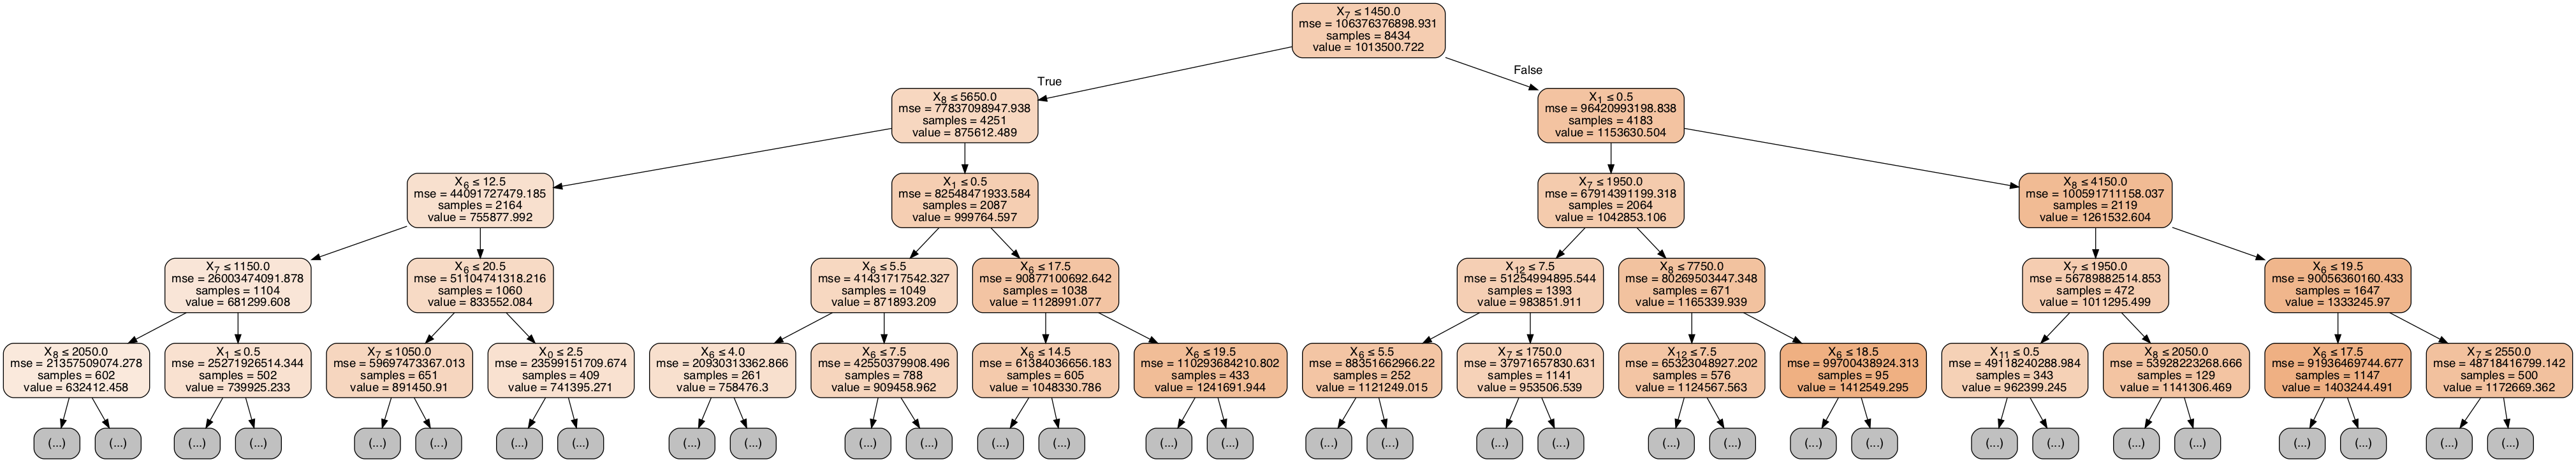

In [873]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtr, out_file=dot_data,max_depth=4,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [874]:
# Import
from sklearn.ensemble import GradientBoostingRegressor

# 1. Set up the model
gbr = GradientBoostingRegressor()
# 2. Use fit
gbr.fit(X_train, y_train)
gbr_predict = gbr.predict(X_test)
mse = mean_squared_error(y_test, gbr_predict)
rmse = np.sqrt(mse)
r2_score = gbr.score(X_test,y_test)

# Calculate MAD and MAPE
errors = abs(gbr_predict - y_test)
mae = np.mean(errors)
mape = 100 * np.mean(errors / y_test)

#entering metrics score to the metics dataframe
metrics.loc['rmse','GradientBoost'] = rmse
metrics.loc['r2_score','GradientBoost'] = r2_score
metrics.loc['mae','GradientBoost'] = mae
metrics.loc['mape','GradientBoost'] = mape

print("Mean Squared Error: %.2f" % mse)
print("Root Mean Squared Error: %.2f" % rmse)
print("r-squared score : ", r2_score)
print('Mean Absolute Deviation (MAE): {:0.2f}'.format(mae))
print('Mean Absolute Percent Error (MAPE): {:0.2f}'.format(mape))

Mean Squared Error: 25679823410.25
Root Mean Squared Error: 160249.25
r-squared score :  0.7463351890632407
Mean Absolute Deviation (MAE): 124156.64
Mean Absolute Percent Error (MAPE): 13.02


In [875]:
# Import
from sklearn.ensemble import RandomForestRegressor

# 1. Set up the model
rfr = RandomForestRegressor()
# 2. Use fit
rfr.fit(X_train, y_train)
rfr_predict = rfr.predict(X_test)
mse = mean_squared_error(y_test, rfr_predict)
rmse = np.sqrt(mse)
r2_score = rfr.score(X_test,y_test)

# Calculate MAE and MAPE
errors = abs(rfr_predict - y_test)
mae = np.mean(errors)
mape = 100 * np.mean(errors / y_test)

#entering metrics score to the metics dataframe
metrics.loc['rmse','RandomForest'] = rmse
metrics.loc['r2_score','RandomForest'] = r2_score
metrics.loc['mae','RandomForest'] = mae
metrics.loc['mape','RandomForest'] = mape

print("Mean Squared Error (MSE): %.2f" % mse)
print("Root Mean Squared Error (RMSE): %.2f" % rmse)
print("r-squared score : ", r2_score)
print('Mean Absolute Deviation (MAE): {:0.2f}'.format(mae))
print('Mean Absolute Percent Error (MAPE): {:0.2f}'.format(mape))

/Users/hp/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Mean Squared Error (MSE): 25762504105.35
Root Mean Squared Error (RMSE): 160507.02
r-squared score :  0.745518470717669
Mean Absolute Deviation (MAE): 122098.99
Mean Absolute Percent Error (MAPE): 12.92


In [876]:
metrics

,LinearReg,DecisionTree,GradientBoost,RandomForest
rmse,233016,208234,160249,160507
r2_score,0.463659,0.571678,0.746335,0.745518
mae,182963,155321,124157,122099
mape,19.2771,16.1339,13.0186,12.9249


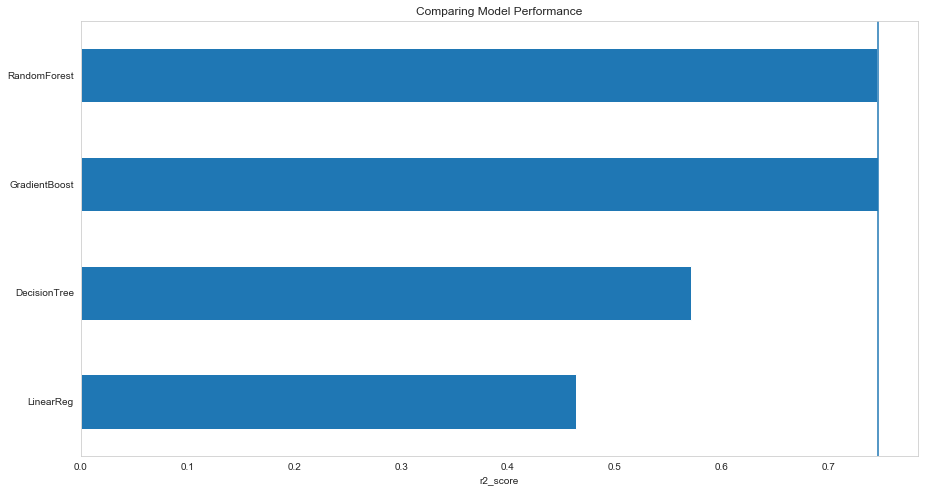

In [877]:
#plot a horizontal bar plot for the metrics of different regressor
fig, ax = plt.subplots(figsize=(15,8))
metrics.loc['r2_score'].plot(kind='barh', ax=ax)
ax.axvline(max(metrics.loc['r2_score']))
plt.title('Comparing Model Performance')
plt.xlabel('r2_score')
ax.grid()


According to the r2_score,  Gradient Boosted Regression model  is the best performing model.  Random Forest Regression model is the second better performing model for this dataset.

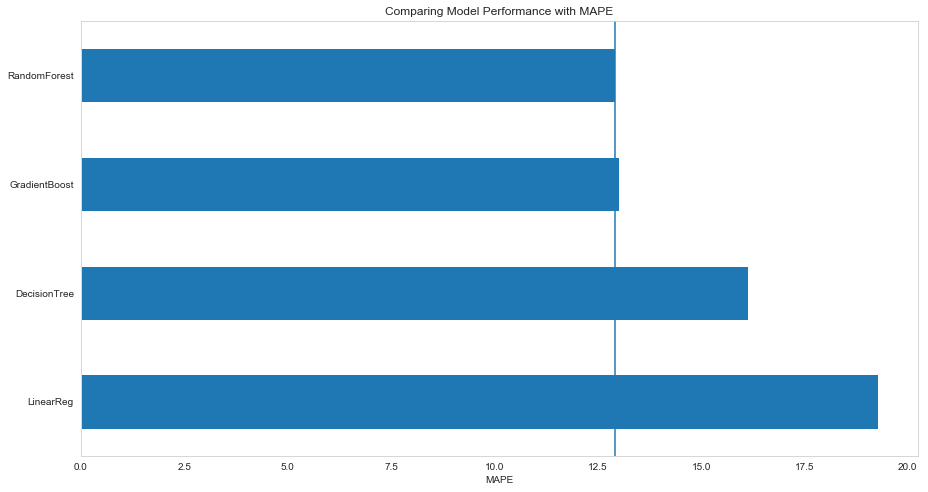

In [878]:
#plot a horizontal bar plot for the metrics of different regressor
fig, ax = plt.subplots(figsize=(15,8))
metrics.loc['mape'].plot(kind='barh', ax=ax)
ax.axvline(min(metrics.loc['mape']))
plt.title('Comparing Model Performance with MAPE')
plt.xlabel('MAPE')
ax.grid()

According to the Mean absolute percentage error (Mape), Rondom Forest Regressor model is the better performing model. Gradient Boosting Regressor model is the second better performing model.

# Hyperparameter Tuning

In [879]:
#Preparing a dataframe for model analysis after parameter tuning
#Data frame for evaluation metrics for tuned models
tuned_metrics = pd.DataFrame(index=['rmse', 'r2_score', 'mae', 'mape'],columns=['LinearReg','DecisionTree','GradientBoost','RandomForest'])

In [880]:
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [881]:
from sklearn.model_selection import GridSearchCV

# setup the hyperparameter grid
parameters = {'copy_X':[True, False], 'fit_intercept':[True,False], 'normalize':[True,False]}
grid_search_lr = GridSearchCV(estimator = lr, param_grid = parameters, cv=5)
grid_search_lr.fit(X_train, y_train)
grid_search_lr_predict = grid_search_lr.predict(X_test)
mse = mean_squared_error(y_test, grid_search_lr_predict)
rmse = np.sqrt(mse)
r2_score = grid_search_lr.score(X_test,y_test)

# Calculate MAE and MAPE
errors = abs(grid_search_lr_predict - y_test)
mae = np.mean(errors)
mape = 100 * np.mean(errors / y_test)

#entering metrics score to the tuned_metics dataframe
tuned_metrics.loc['rmse','LinearReg'] = rmse
tuned_metrics.loc['r2_score','LinearReg'] = r2_score
tuned_metrics.loc['mae','LinearReg'] = mae
tuned_metrics.loc['mape','LinearReg'] = mape

print("Mean Squared Error (MSE): %.2f" % mse)
print("Root Mean Squared Error (RMSE): %.2f" % rmse)
print("r-squared score : ", r2_score)
print('Mean Absolute Deviation (MAE): {:0.2f}'.format(mae))
print('Mean Absolute Percent Error (MAPE): {:0.2f}'.format(mape))

Mean Squared Error (MSE): 54296634556.66
Root Mean Squared Error (RMSE): 233016.38
r-squared score :  0.46365886870464984
Mean Absolute Deviation (MAE): 182963.47
Mean Absolute Percent Error (MAPE): 19.28


In [882]:
# Find the best parameters 
grid_search_lr.best_params_

{'copy_X': True, 'fit_intercept': True, 'normalize': True}

In [883]:
dtr.get_params()

{'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

In [884]:
# setup the hyperparameter grid
param_grid = {
    'max_depth': [10, 20, 40, 70, 80, 90, 100],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [16, 18, 20],
    'min_samples_split': [2, 4, 6, 12]
}

# Instantiate the grid search model
grid_search_dtr = GridSearchCV(estimator = dtr, param_grid = param_grid, 
                          cv = 5)
grid_search_dtr.fit(X_train, y_train)
grid_search_dtr_predict = grid_search_dtr.predict(X_test)
mse = mean_squared_error(y_test, grid_search_dtr_predict)
rmse = np.sqrt(mse)
r2_score = grid_search_dtr.score(X_test,y_test)

# Calculate MAE and MAPE
errors = abs(grid_search_dtr_predict - y_test)
mae = np.mean(errors)
mape = 100 * np.mean(errors / y_test)

#entering metrics score to the tuned_metics dataframe
tuned_metrics.loc['rmse','DecisionTree'] = rmse
tuned_metrics.loc['r2_score','DecisionTree'] = r2_score
tuned_metrics.loc['mae','DecisionTree'] = mae
tuned_metrics.loc['mape','DecisionTree'] = mape

print("Mean Squared Error (MSE): %.2f" % mse)
print("Root Mean Squared Error (RMSE): %.2f" % rmse)
print("r-squared score : ", r2_score)
print('Mean Absolute Deviation (MAE): {:0.2f}'.format(mae))
print('Mean Absolute Percent Error (MAPE): {:0.2f}'.format(mape))

Mean Squared Error (MSE): 30414335689.09
Root Mean Squared Error (RMSE): 174397.06
r-squared score :  0.6995677661373396
Mean Absolute Deviation (MAE): 130971.73
Mean Absolute Percent Error (MAPE): 13.73


In [885]:
# Find the best parameters
grid_search_dtr.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 16,
 'min_samples_split': 2}

In [886]:
gbr.get_params()

{'alpha': 0.9,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'auto',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

We are going to use RandomizedSearchCV instead of GridSearchCV inorder to reduce some computational time.

In [887]:
from sklearn.model_selection import RandomizedSearchCV
from time import time

# setup the hyperparameter grid
param_dist = {
    'n_estimators': [200,300,400],
    'max_depth': [10, 20, 40, 70, 80, 90, 100],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [16, 18, 20],
    'min_samples_split': [2, 4, 6, 12]
}

# Instantiate the grid search model for GradientBoostingRegressor
randomized_search_gbr = RandomizedSearchCV(estimator = gbr, param_distributions = param_dist, 
                          n_iter=10, cv = 5)

start = time()

# Fit it to the data
randomized_search_gbr.fit(X_train, y_train)

print('RandomizedSearchCV took %.2f seconds for %d candidates'
      ' parameter settings.' % ((time() - start), randomized_search_gbr.n_iter))

randomized_search_gbr_predict = randomized_search_gbr.predict(X_test)
mse = mean_squared_error(y_test, randomized_search_gbr_predict)
rmse = np.sqrt(mse)
r2_score = randomized_search_gbr.score(X_test,y_test)

# Calculate MAE and MAPE
errors = abs(randomized_search_gbr_predict - y_test)
mae = np.mean(errors)
mape = 100 * np.mean(errors / y_test)

#entering metrics score to the tuned_metics dataframe
tuned_metrics.loc['rmse','GradientBoost'] = rmse
tuned_metrics.loc['r2_score','GradientBoost'] = r2_score
tuned_metrics.loc['mae','GradientBoost'] = mae
tuned_metrics.loc['mape','GradientBoost'] = mape

print("Mean Squared Error (MSE): %.2f" % mse)
print("Root Mean Squared Error (RMSE): %.2f" % rmse)
print("r-squared score : ", r2_score)
print('Mean Absolute Deviation (MAE): {:0.2f}'.format(mae))
print('Mean Absolute Percent Error (MAPE): {:0.2f}'.format(mape))


RandomizedSearchCV took 179.88 seconds for 10 candidates parameter settings.
Mean Squared Error (MSE): 21836906388.91
Root Mean Squared Error (RMSE): 147773.16
r-squared score :  0.7842954508645102
Mean Absolute Deviation (MAE): 113736.58
Mean Absolute Percent Error (MAPE): 11.94


In [888]:
# Find the best parameters
randomized_search_gbr.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 20,
 'max_features': 'sqrt',
 'max_depth': 10}

In [889]:
rfr.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [890]:
# setup the hyperparameter grid
param_dist = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# Instantiate the grid search model for RandomForestRegressor
randomized_search_rfr = RandomizedSearchCV(estimator = rfr, param_distributions= param_dist, 
                          n_iter = 10, cv = 5)

start = time()

# Fit it to the data
randomized_search_rfr.fit(X_train, y_train)

print('RandomizedSearchCV took %.2f seconds for %d candidates'
      ' parameter settings.' % ((time() - start), randomized_search_rfr.n_iter))

randomized_search_rfr_predict = randomized_search_rfr.predict(X_test)
mse = mean_squared_error(y_test, randomized_search_rfr_predict)
rmse = np.sqrt(mse)
r2_score = randomized_search_rfr.score(X_test,y_test)

# Calculate MAE and MAPE
errors = abs(randomized_search_rfr_predict - y_test)
mae = np.mean(errors)
mape = 100 * np.mean(errors / y_test)

#entering metrics score to the tuned_metics dataframe
tuned_metrics.loc['rmse','RandomForest'] = rmse
tuned_metrics.loc['r2_score','RandomForest'] = r2_score
tuned_metrics.loc['mae','RandomForest'] = mae
tuned_metrics.loc['mape','RandomForest'] = mape

print("Mean Squared Error (MSE): %.2f" % mse)
print("Root Mean Squared Error (RMSE): %.2f" % rmse)
print("r-squared score : ", r2_score)
print('Mean Absolute Deviation (MAE): {:0.2f}'.format(mae))
print('Mean Absolute Percent Error (MAPE): {:0.2f}'.format(mape))


RandomizedSearchCV took 65.77 seconds for 10 candidates parameter settings.
Mean Squared Error (MSE): 29579309605.38
Root Mean Squared Error (RMSE): 171986.36
r-squared score :  0.7078161380310023
Mean Absolute Deviation (MAE): 132381.33
Mean Absolute Percent Error (MAPE): 13.99


In [891]:
# Find the best parameters
randomized_search_rfr.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 3,
 'max_features': 3,
 'max_depth': 80,
 'bootstrap': True}

In [892]:
tuned_metrics

,LinearReg,DecisionTree,GradientBoost,RandomForest
rmse,233016,174397,147773,171986
r2_score,0.463659,0.699568,0.784295,0.707816
mae,182963,130972,113737,132381
mape,19.2771,13.7336,11.9358,13.9858


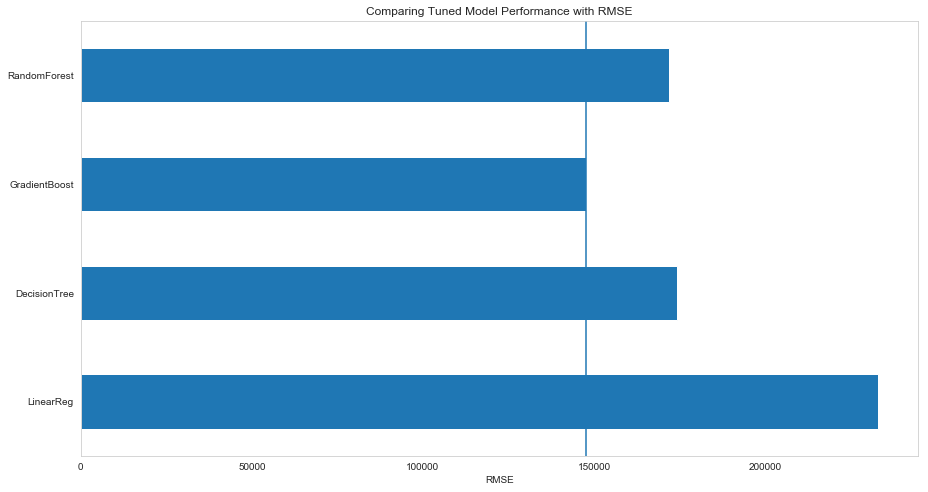

In [893]:
#plot a horizontal bar plot for the metrics of different regressor
fig, ax = plt.subplots(figsize=(15,8))
tuned_metrics.loc['rmse'].plot(kind='barh', ax=ax)
ax.axvline(min(tuned_metrics.loc['rmse']))
plt.title('Comparing Tuned Model Performance with RMSE')
plt.xlabel('RMSE')
ax.grid()

According to the Root Mean Squared Error, Gradient Boost Regression model is the best performing model.

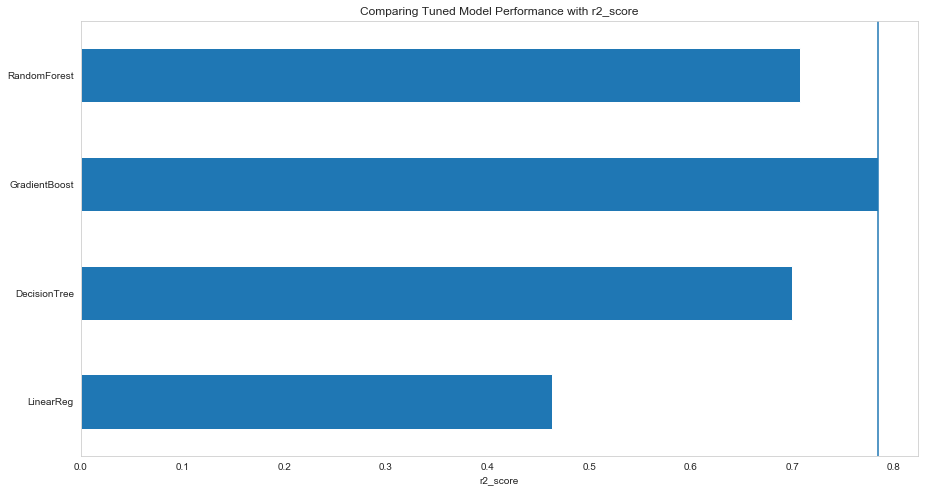

In [894]:
#plot a horizontal bar plot for the metrics of different regressor
fig, ax = plt.subplots(figsize=(15,8))
tuned_metrics.loc['r2_score'].plot(kind='barh', ax=ax)
ax.axvline(max(tuned_metrics.loc['r2_score']))
plt.title('Comparing Tuned Model Performance with r2_score')
plt.xlabel('r2_score')
ax.grid()

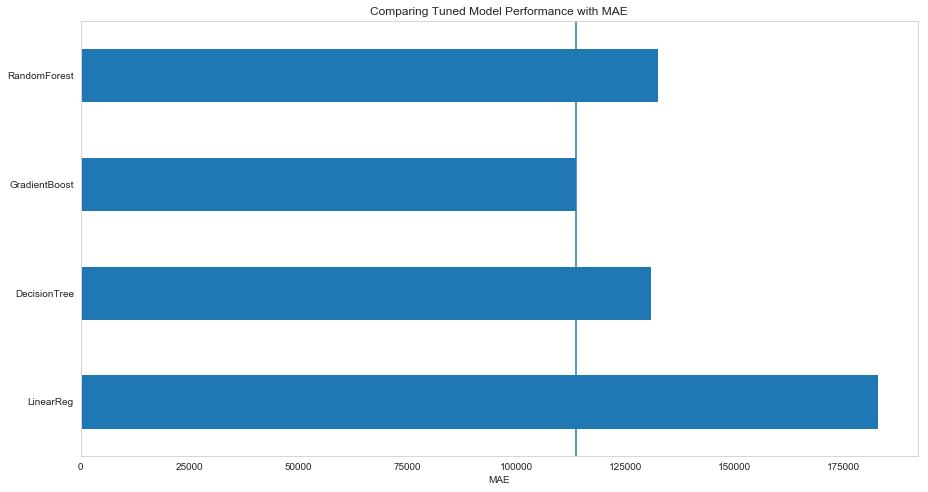

In [895]:
#plot a horizontal bar plot for the metrics of different regressor
fig, ax = plt.subplots(figsize=(15,8))
tuned_metrics.loc['mae'].plot(kind='barh', ax=ax)
ax.axvline(min(tuned_metrics.loc['mae']))
plt.title('Comparing Tuned Model Performance with MAE')
plt.xlabel('MAE')
ax.grid()

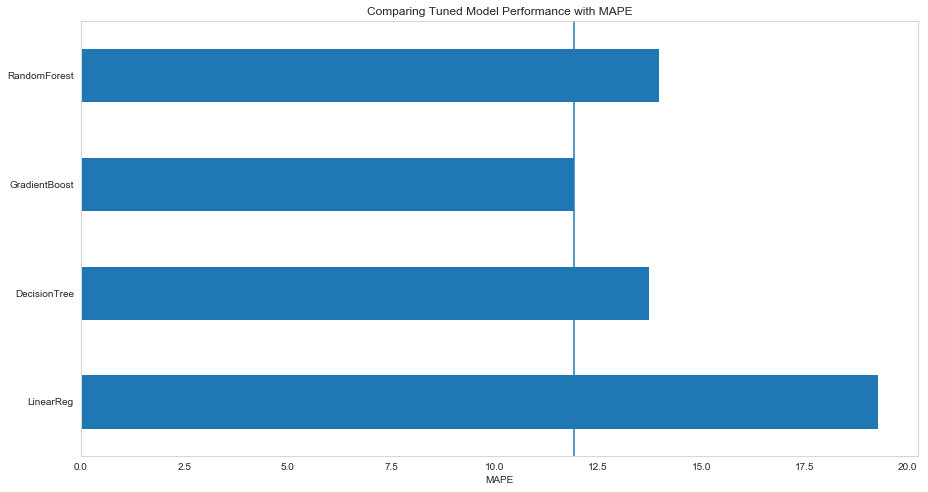

In [896]:
#plot a horizontal bar plot for the metrics of different regressor

import seaborn as sns
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(15,8))
tuned_metrics.loc['mape'].plot(kind='barh', ax=ax)
ax.axvline(min(tuned_metrics.loc['mape']))
plt.title('Comparing Tuned Model Performance with MAPE')
plt.xlabel('MAPE')
ax.grid()

According to the Mean absolute percentage error (MAPE), Gradient Boost Regression model is the best performing model. All of the mertics suggest that Gradient Boosted Regression model is the better performing model for this dataset.